In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv('Breast_cancer_data.csv')

In [4]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## exploratory data analysis


<AxesSubplot:>

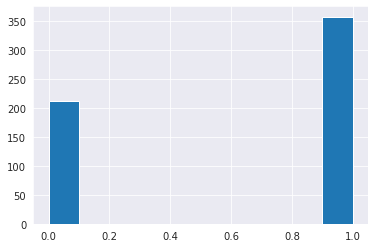

In [5]:
data['diagnosis'].hist()

the data is currently unbalanced 

### one of the hypotheses of naive bayes , the features must be independant 

<AxesSubplot:>

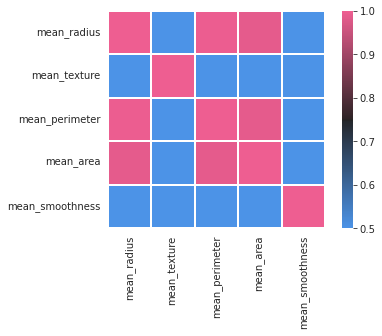

In [6]:
corr = data.iloc[:,:-1].corr(method ="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=0.5,cmap = cmap,square = True, linewidths=0.2)

perimeter and raduis are highly correlated 
area and raduis are also highly correlated 

So to apply naive bayes we might need to work with only one variable : raduis - perimeter or area

### test the model with all variables 

### test the model with the variables mean_radius - mean_texture and mean smoothness which are not correlated 

In [8]:
data2 = data[['mean_radius','mean_texture','mean_smoothness','diagnosis']]

In [9]:
data2.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<AxesSubplot:xlabel='mean_smoothness', ylabel='Count'>

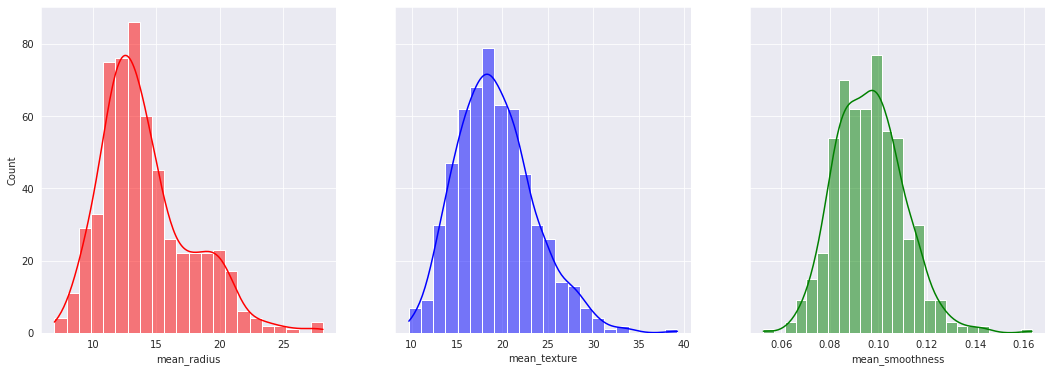

In [11]:
fig, axes = plt.subplots(1,3,figsize = (18,6),sharey=True)
sns.histplot(data,ax=axes[0],x='mean_radius',kde=True,color='r')
sns.histplot(data,ax=axes[1],x='mean_texture',kde=True,color='b')
sns.histplot(data,ax=axes[2],x='mean_smoothness',kde=True,color='g')

mean_smoothness and mean_texture kind of follow the normal distribution 
mean_raduis doesn't follow a normal distribution but for sake of simplicity i am going to fit a normal distribution on this variable too 

### code a naive bayes algo


In [12]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes :
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [13]:
def calculate_likelihood_gaussian(df,feat_name,feat_val,Y,label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean,std = df[feat_name].mean() , df[feat_name].std()
    px_given_y = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-((feat-val-mean)**2/(2*std**2)))
    return px_given_y